# Labrador Sea story

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import Data

data,sta,date,lon,lat,P,d,t,s,Tr,fluo,oxy_uM,oxy_mL,rho,isop,si,ti,NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,nut = Data.AllData_variables()
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_rho,PaTh_d = Data.PaTh_variables()
listAllSta,listPaThSta,PaThDataSorted,PaThSort_sta,PaThSort_d,Pa,Th,PaTh,PaErr,ThErr,PaThErr = Data.PaTh_varSorted()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))


354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


354.0 13.0
354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.


354.0 13.0


In [3]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.figure as mfig
import matplotlib.image as mpimg
from matplotlib import gridspec

import netCDF4 as nc
import numpy as np
import scipy.io as sio
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import  psu_tools

from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [4]:
#dir()
#locals()
#globals()
listPaThSta

['K1',
 'LS2',
 'BB1',
 'BB3',
 'BB2',
 'CB2',
 'CB3',
 'CB4',
 '308/CAA8',
 'KC 500-2007',
 'KC 2000-2007',
 'KC 2700-2007',
 'A01-95',
 'L1.1-2009',
 'L2-2009',
 'L3-2009',
 '2',
 '93']

# All stations; Pa & Th data

In [5]:
from wand.image import Image as WImage
img1= WImage(filename='/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/PaThStations-LScompar_Map.png')
img2= WImage(filename='/home/mgrenier/Documents/GEOTRACES_ARCTIC/moran-etal-epsl-2002-Fig5-v3.png')
img2
img2.save(filename='/home/mgrenier/Documents/GEOTRACES_ARCTIC/moran-etal-epsl-2002-Fig5-v3.png')


In [6]:
img1=mpimg.imread('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/PaThStations-LScompar_Map.png')
img2=mpimg.imread('/home/mgrenier/Documents/GEOTRACES_ARCTIC/moran-etal-epsl-2002-Fig5-v3.png')


# Moran's et al, 2002 (EPSL):
### Suggest a cessation of deep convection between 1993 and 1999, leading to an increase of the intermediate/deep water age from 6 yr to 12 yr.

# Comparison between stn 2 (1993), stn 93 (1999) and K1 and LS2 (2015)

### Decrease of Th concentrations between 1993 and 2015: Intensification of deep convection and/or stronger particle flux? 
### Relaxing LS2 profile compared to the more vertically constant K1 profile: weakening of the deep convection strength at LS2? Plus higher particle flux at K1?

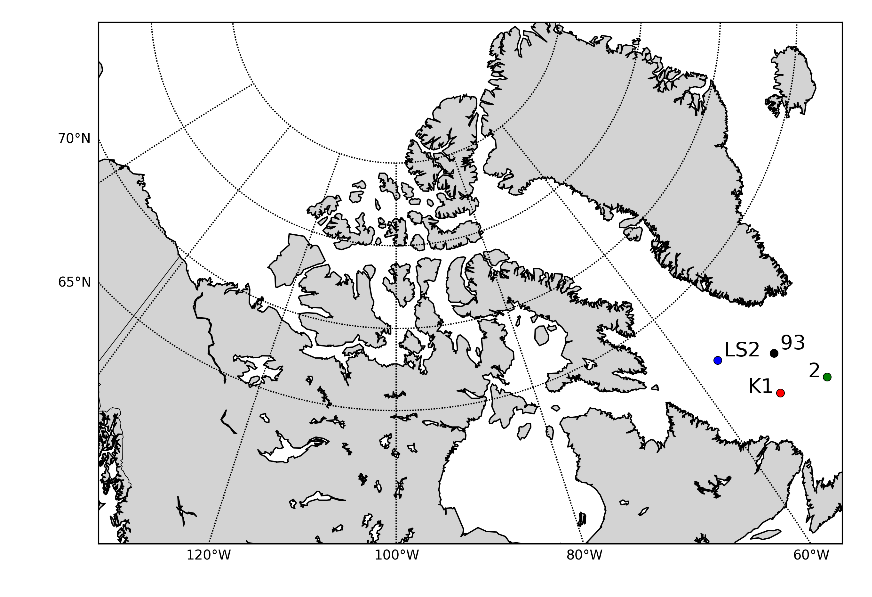

In [7]:
fig = plt.figure(figsize=(20, 10)) 
plt.imshow(img1);
plt.axis('off');

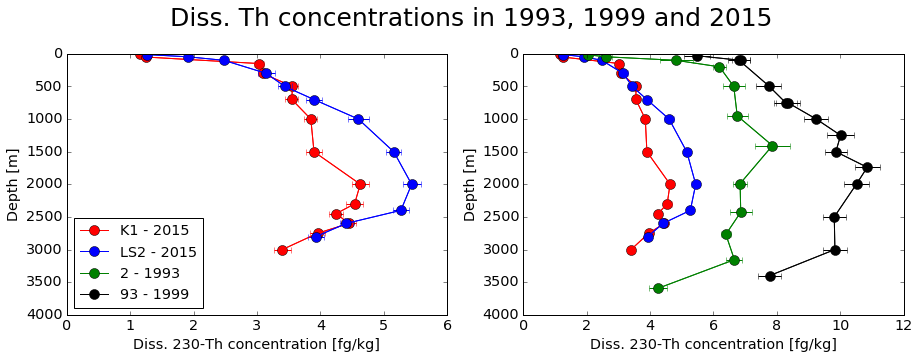

In [8]:
fig,((ax1,ax2)) = plt.subplots(1,2,facecolor='w',figsize=(15, 5)) 

fig.suptitle('Diss. Th concentrations in 1993, 1999 and 2015', fontsize = 25)
fig.subplots_adjust(top=0.85)
#Plot Pa/Th sample profiles
for station,M,S,C in zip(('K1','LS2'),
                          ('o-','o-'),
                          (10,10,10),('red','blue')):     
    ax1.plot(Th[sta == station],PaThSort_d[sta == station],M,markersize=S,mew=0.5,color=C,label=station)
    ax1.errorbar(Th[sta == station],PaThSort_d[sta == station],xerr=ThErr[PaThSort_sta == station].tolist(),color=C)
    ax1.set_xlim([0,6])
    ax1.set_ylim([0,4000])
    ax1.set_xlabel('Diss. 230-Th concentration [fg/kg]')
    ax1.set_ylabel('Depth [m]')
    ax1.invert_yaxis()
    
for station,M,S,C,date in zip(('K1','LS2','2','93'),
                        ('o-','o-','o-','o-'),
                        (10,10,10,10),('red','blue','green','k'),(' - 2015',' - 2015',' - 1993',' - 1999')):     
    ax2.plot(PaThDataSorted.Th[sta == station],PaThDataSorted.d[sta == station],M,markersize=S,mew=0.5,color=C,label=station+date)
    ax2.errorbar(Th[sta == station],PaThSort_d[sta == station],xerr=ThErr[PaThSort_sta == station].tolist(),color=C)
    ax2.set_xlim([0,12])
    ax2.set_ylim([0,4000])
    ax2.set_xlabel('Diss. 230-Th concentration [fg/kg]')
    ax2.set_ylabel('Depth [m]')
    ax2.invert_yaxis()
    
# get handles
handles, labels = ax2.get_legend_handles_labels()
# use them in the legend
ax1.legend(handles[0:4], labels, loc='lower left', numpoints=1);

savefig('Figures/PaThStations_LabrSea-ThCompar.png',bbox_inches='tight')


## => 1-D model in the area of K1 to reproduce the profile evolution. Role of the particle flux evolution (productivity?)  Of the sea ice coverage evolution?

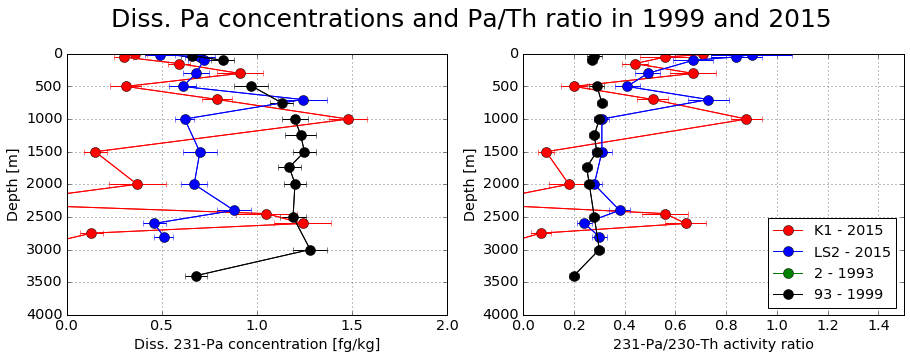

In [9]:
fig,((ax1,ax2)) = plt.subplots(1,2,facecolor='w',figsize=(15, 5)) 

fig.suptitle('Diss. Pa concentrations and Pa/Th ratio in 1999 and 2015', fontsize = 25)
fig.subplots_adjust(top=0.85)

#Plot Pa/Th sample profiles
for station,M,S,C,date in zip(('K1','LS2','2','93'),
                        ('o-','o-','o-','o-'),
                        (10,10,10,10),('red','blue','green','k'),(' - 2015',' - 2015',' - 1993',' - 1999')):
        for ax,xfield,yfield,XERR,xlabels,ylabels,xranges,yranges in zip((ax1,ax2),(Pa,PaTh),
                                    (PaThSort_d,PaThSort_d),
                                    (PaErr,PaThErr),
                                    ('Diss. 231-Pa concentration [fg/kg]','231-Pa/230-Th activity ratio'),
                                    ('Depth [m]','Depth [m]'),
                                    ([0,2],[0,1.5]),
                                    ([0,4000],[0, 4000])):
            ax.plot(xfield[sta == station],yfield[sta == station],M,markersize=S,color=C,label=station+date)
            ax.errorbar(xfield[sta == station],yfield[sta == station],xerr=XERR[PaThSort_sta == station].tolist(),color=C)
            ax.set_xlim(xranges)
            ax.set_ylim(yranges)
            ax.set_xlabel(xlabels)
            ax.set_ylabel(ylabels)
            ax.invert_yaxis()
    
# get handles
handles, labels = ax2.get_legend_handles_labels()
# use them in the legend
ax2.legend(handles[0:4], labels, loc='lower right', numpoints=1);
for ax, in zip((ax1,ax2)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

savefig('Figures/PaThStations_LabrSea-PaandRatioCompar.png',bbox_inches='tight')


In [10]:
SiO4_1.head()
#SiO4_1.SiO4_1
#nut.SiO4_1[sta == 'K1'],nut.d[sta == 'K1']
#nut.sal[sta == '2'],nut.d[sta == '2']
#data.sal[(sta == '2') & (data.SiO4_1.notnull())]

,Cruise,Station,Type,date,lon,lat,z_bottom,P,d,Cast,Cast name,Pressure,Pa,PaErr,Th,ThErr,PaTh,PaThErr,eNd,Erreur sur eNd,[Nd]pmol/kg,Erreur sur [Nd],Nd/yb,Ce/Ce*,temp,rho,transmi,fluo,sal,dens,SPVA_01 [m**3/kg],VAIS_01 [s^-2],SIGO_01 [kg/m**3],theta,SIGP_01 [kg/m**3],FRET_01 [degrees C],DOXY_01 [ml/l],CDOM_01 [mg/m**3],NTRA_01 [mmol/m**3],PSAR_01 [ueinsteins/s/m**2],SPAR_01 [ueinsteins/s/m**2],ASAL [g/kg],CONT [deg C],D_CT [kg/m^3],D0CT [kg/m^3],Conductivity [uS/cm],Oxy_uM,Oxy_mL,"Oxygen, SBE 43 [% saturation]","Oxygen Saturation, Garcia & Gordon [ml/l]","Oxygen Saturation, Weiss [ml/l]","Oxygen raw, SBE 43 [V]",flag,Cast-nut,Press,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,Ammonium-1 [?mol/L],Ammonium-2 [?mol/L],Extracted Chlorophyll a (ug/l),Extracted Phaeo-pigment (ug/l),Unnamed: 66,Unnamed: 67,Chlorophyll a (Fluorometer) mg/m^3
5103,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,10.0,9.909,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.549,26.157957,93.761,0.856,33.323,26.204,184.849,NaN,26.158,6.55,26.158,-1.83,7.196,5.701,NaN,23.514,160.160,33.481,6.563,26.206,26.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.221,0.06,NaN,0.13,NaN,0.10,NaN,0.0,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
5106,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,13.0,12.881,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.547,26.158218,93.675,0.925,33.323,26.218,184.863,0,26.158,6.547,26.158,-1.84,7.177,5.780,NaN,16.73,160.452,33.481,6.561,26.22,26.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,13.026,0.05,NaN,0.10,NaN,0.10,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5107,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,14.0,13.872,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.547,26.158218,93.688,0.888,33.323,26.223,184.876,0,26.158,6.547,26.158,-1.84,7.183,5.595,NaN,15.395,159.851,33.481,6.561,26.224,26.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,13.075,0.06,NaN,0.13,NaN,0.10,NaN,0.0,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN
5113,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,20.0,19.817,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.563,26.372205,92.650,1.412,33.597,26.464,164.645,0,26.372,6.563,26.372,-1.86,7.124,5.977,NaN,8.338,158.180,33.756,6.573,26.466,26.374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,20.487,0.06,NaN,0.15,NaN,0.10,NaN,0.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
5125,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,32.0,31.706,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.742,27.409161,95.566,3.233,34.627,27.557,66.378,0,27.409,4.741,27.409,-1.92,8.296,6.059,NaN,2.186,156.200,34.791,4.738,27.559,27.411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,31.904,0.09,0.1,1.00,0.96,0.21,0.21,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from collections import OrderedDict

d_sort = OrderedDict()
for stn in listPaThSta:
    d_sort[stn] = data[data.Station == stn].sort_values(by='d', ascending=[True])
dataSorted = pd.concat(d_sort.values())
ANSi = dataSorted[(dataSorted.SiO4_1.notnull()) & (dataSorted.Cast.notnull())]
#dataSorted
ANSi.head()

,Cruise,Station,Type,date,lon,lat,z_bottom,P,d,Cast,Cast name,Pressure,Pa,PaErr,Th,ThErr,PaTh,PaThErr,eNd,Erreur sur eNd,[Nd]pmol/kg,Erreur sur [Nd],Nd/yb,Ce/Ce*,temp,rho,transmi,fluo,sal,dens,SPVA_01 [m**3/kg],VAIS_01 [s^-2],SIGO_01 [kg/m**3],theta,SIGP_01 [kg/m**3],FRET_01 [degrees C],DOXY_01 [ml/l],CDOM_01 [mg/m**3],NTRA_01 [mmol/m**3],PSAR_01 [ueinsteins/s/m**2],SPAR_01 [ueinsteins/s/m**2],ASAL [g/kg],CONT [deg C],D_CT [kg/m^3],D0CT [kg/m^3],Conductivity [uS/cm],Oxy_uM,Oxy_mL,"Oxygen, SBE 43 [% saturation]","Oxygen Saturation, Garcia & Gordon [ml/l]","Oxygen Saturation, Weiss [ml/l]","Oxygen raw, SBE 43 [V]",flag,Cast-nut,Press,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,Ammonium-1 [?mol/L],Ammonium-2 [?mol/L],Extracted Chlorophyll a (ug/l),Extracted Phaeo-pigment (ug/l),Unnamed: 66,Unnamed: 67,Chlorophyll a (Fluorometer) mg/m^3
6440,2015002,K1,C,2015-07-14T13:13:35.00,-53.370,56.1216,3309.0,10.0,9.909,2.0,Geo-AN1,7.0,0.36,0.06,1.16,0.04,0.71,0.13,NaN,NaN,NaN,NaN,NaN,NaN,6.656,26.151050,93.323,0.554,33.332,26.197,185.508,NaN,26.151,6.657,26.151,-1.83,7.199,5.616,NaN,NaN,543.639,33.49,6.67,26.199,26.153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.260,0.07,NaN,0.13,NaN,0.1,NaN,0.0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
5103,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,10.0,9.909,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.549,26.157957,93.761,0.856,33.323,26.204,184.849,NaN,26.158,6.55,26.158,-1.83,7.196,5.701,NaN,23.514,160.160,33.481,6.563,26.206,26.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.221,0.06,NaN,0.13,NaN,0.1,NaN,0.0,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
5106,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,13.0,12.881,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.547,26.158218,93.675,0.925,33.323,26.218,184.863,0,26.158,6.547,26.158,-1.84,7.177,5.780,NaN,16.73,160.452,33.481,6.561,26.22,26.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,13.026,0.05,NaN,0.10,NaN,0.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5107,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,14.0,13.872,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.547,26.158218,93.688,0.888,33.323,26.223,184.876,0,26.158,6.547,26.158,-1.84,7.183,5.595,NaN,15.395,159.851,33.481,6.561,26.224,26.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,13.075,0.06,NaN,0.13,NaN,0.1,NaN,0.0,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN
5113,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,20.0,19.817,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.563,26.372205,92.650,1.412,33.597,26.464,164.645,0,26.372,6.563,26.372,-1.86,7.124,5.977,NaN,8.338,158.180,33.756,6.573,26.466,26.374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,20.487,0.06,NaN,0.15,NaN,0.1,NaN,0.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN


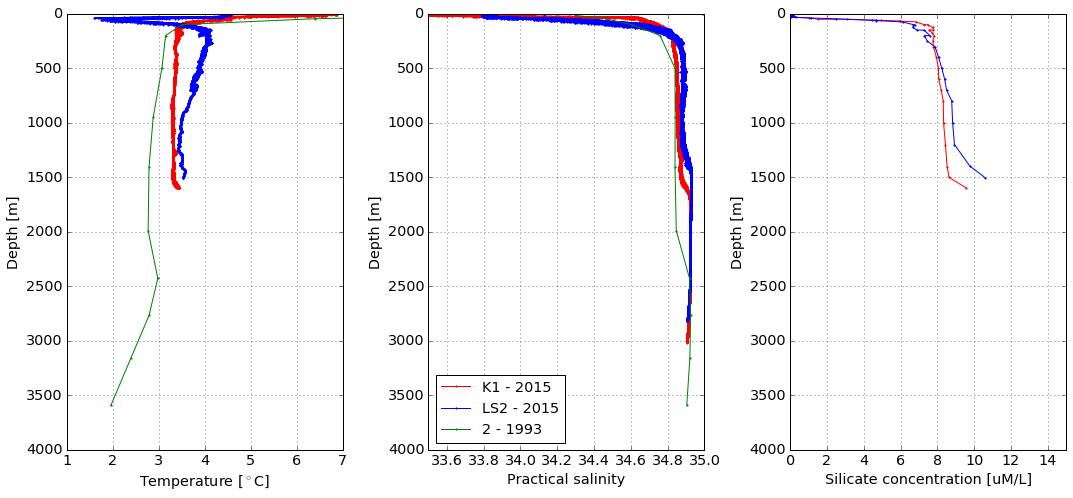

In [16]:
fig,((ax1,ax2,ax3)) = plt.subplots(1,3,facecolor='w',figsize=(15, 7)) 

for station,M,S,C,date in zip(('K1','LS2','2','93'),
                        ('.-','.-','.-','o-'),
                        (3,3,3,10),('red','blue','green','k'),(' - 2015',' - 2015',' - 1993',' - 1999')):     
     for ax,xfield,yfield,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax3),(dataSorted.theta[(dataSorted.Station == station)],dataSorted.sal[(dataSorted.Station == station)],ANSi.SiO4_1[(ANSi.Station == station)]),
                                    (dataSorted.d[(dataSorted.Station == station)],dataSorted.d[(dataSorted.Station == station)],ANSi.d[(ANSi.Station == station)]),
                                    ('Temperature [$^\circ$C]','Practical salinity','Silicate concentration [uM/L]'),
                                    ('Depth [m]','Depth [m]','Depth [m]'),
                                    ([1,7],[33.5,35.0],[0,15]),
                                    ([0,4000],[0,4000],[0, 4000])):
        ax.plot(xfield,yfield,M,markersize=S,mew=0.5,color=C,label=station+date)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()

ax1.plot(s[sta == '2'],d[sta == '2'],'.-',markersize=10,mew=0.5,color='green')

handles, labels = ax1.get_legend_handles_labels()
ax2.legend(handles[0:3],labels,loc='lower left',numpoints=1);

fig.tight_layout();

for ax, in zip((ax1,ax2,ax3)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

savefig('Figures/PaThStations_LabrSea-theta-S-SiCompar.png',bbox_inches='tight')


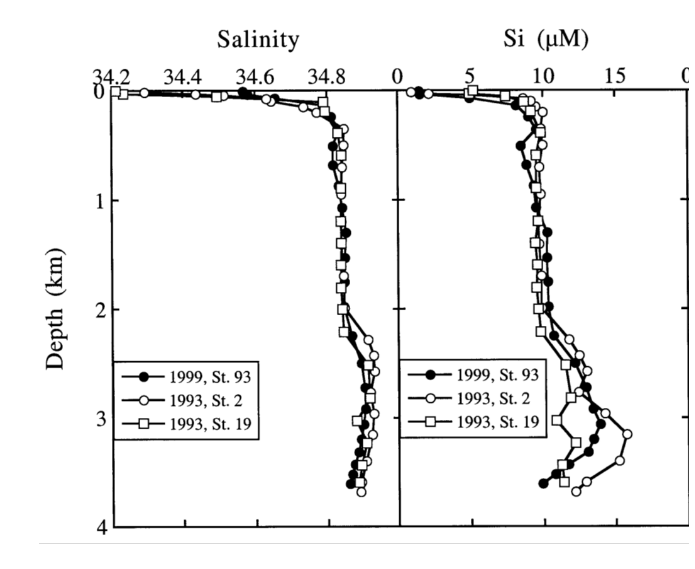

In [13]:
fig, ax = plt.subplots(1,1,facecolor='w',figsize=(10, 8)) 

ax.imshow(img2);
ax.axis('off');

fig.tight_layout();



In [14]:
'''fig,((ax1,ax2,ax3)) = plt.subplots(1,3,facecolor='w',figsize=(10, 15)) 
gs = gridspec.GridSpec(3, 2) 
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1:,:])


for station,M,S,C,date in zip(('K1','LS2','2','93'),
                        ('o','o','o-','o-'),
                        (10,10,10,10),('red','blue','green','k'),(' - 2015',' - 2015',' - 1993',' - 1999')):     
     for ax,xfield,yfield,xlabels,ylabels,xranges,yranges in zip((ax1,ax2),(nut.sal,nut.SiO4_1),
                                    (nut.d,nut.d),
                                    ('Practical salinity','Silicate concentration [uM/L]'),
                                    ('Depth [m]','Depth [m]'),
                                    ([33.5,35.0],[0,15]),
                                    ([0,4000],[0, 4000])):
        ax.plot(xfield[sta == station],yfield[sta == station],M,markersize=S,mew=0.5,color=C,label=station+date)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()
    
        ax3.imshow(img2)
        ax3.axis('off')
  #  ax3.set_title('1993 VS 1999 properties in the Labrador Sea',fontsize=30)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[0:2],labels,loc='lower left',numpoints=1);

fig.tight_layout();

for ax, in zip((ax1,ax2)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)
    ''';